In [1]:
import torch
import numpy as np

# Dataset是面向对象的编程，不能实例化
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class TiranicDataset(Dataset):
    def __init__(self, filepath):
        xy = np.genfromtxt(filepath, delimiter=',', dtype=np.float32, skip_header=1, missing_values='', filling_values=np.nan)
        self.len = xy.shape[0] # 取数据集的长度
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len

# Provide the file path to your dataset CSV file
file_path = '/home/fl/my_code/DL_study/data/train_and_test2.csv'
dataset = TiranicDataset(filepath=file_path)

# DataLoader加载器
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2) # 需要的进程数

In [2]:
#------------------------------------------------------#
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(27, 20) # 输入维度是 10，输出维度是 8
        self.linear2 = torch.nn.Linear(20, 1) 
        self.sigmoid = torch.nn.Sigmoid() # 激活函数，添加非线性变换，是一个模块，作为一个层
    
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        return x

model = LogisticRegressionModel()
#-------------------------------------------------------# 
# 二分类的交叉熵，对每个批量求均值，求均值和不求均值会影响学习率
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/home/fl/miniconda3/envs/DTox/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [3]:
#-------------------------------------------------------# 
# 使用 Dataloader 的训练过程
epochs = {}

for epoch in range(1000):
    epochs[epoch]=[]
    for i, data in enumerate(train_loader, 0):
        # 1. prepare data
        inputs, labels = data #这里的 inputs，data 都是矩阵
        # 2. Forward
        
        y_pred = model(inputs)
        if torch.isnan(y_pred).any():
            # Handle NaN values
            # For example, you can replace NaN values with zeros
            y_pred = torch.nan_to_num(y_pred)
        loss = criterion(y_pred, labels)
        epochs[epoch].append(loss.item())
        print('epoch=',epoch, 'iteration=', i, 'loss=', loss.item())
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        # 4.Update
        optimizer.step()

epoch= 0 iteration= 0 loss= 0.6299685835838318
epoch= 0 iteration= 1 loss= 3.7635717391967773
epoch= 0 iteration= 2 loss= 31.25
epoch= 0 iteration= 3 loss= 18.75
epoch= 0 iteration= 4 loss= 15.625
epoch= 0 iteration= 5 loss= 28.125
epoch= 0 iteration= 6 loss= 28.125
epoch= 0 iteration= 7 loss= 18.75
epoch= 0 iteration= 8 loss= 18.75
epoch= 0 iteration= 9 loss= 34.375
epoch= 0 iteration= 10 loss= 28.125
epoch= 0 iteration= 11 loss= 18.75
epoch= 0 iteration= 12 loss= 21.875
epoch= 0 iteration= 13 loss= 21.875
epoch= 0 iteration= 14 loss= 34.375
epoch= 0 iteration= 15 loss= 18.75
epoch= 0 iteration= 16 loss= 31.25
epoch= 0 iteration= 17 loss= 15.625
epoch= 0 iteration= 18 loss= 15.625
epoch= 0 iteration= 19 loss= 25.0
epoch= 0 iteration= 20 loss= 28.125
epoch= 0 iteration= 21 loss= 28.125
epoch= 0 iteration= 22 loss= 46.875
epoch= 0 iteration= 23 loss= 21.875
epoch= 0 iteration= 24 loss= 34.375
epoch= 0 iteration= 25 loss= 28.125
epoch= 0 iteration= 26 loss= 34.375
epoch= 0 iteration= 27 

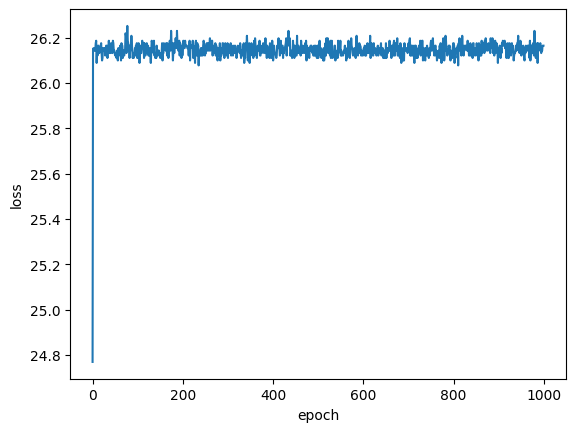

In [4]:
import matplotlib.pyplot as plt
epochs_list = []
mean_loss = []
for k, v in epochs.items():
    epochs_list.append(k)
    mean_loss.append(np.average(v))

# 绘制曲线图
plt.plot(epochs_list, mean_loss)

# 添加标题和标签
plt.xlabel('epoch')
plt.ylabel('loss')

# 显示图形
plt.show()